# 📊 Análise de Desempenho Escolar dos Estudantes

Este projeto tem como objetivo analisar um conjunto de dados contendo informações sobre o desempenho de 1000 estudantes em três disciplinas: matemática, leitura e escrita.

A análise busca identificar padrões e relações entre o desempenho dos alunos e variáveis como:
- Gênero
- Tipo de almoço (indicador socioeconômico)
- Participação em curso preparatório
- Nível de escolaridade dos pais

Através de gráficos e estatísticas, vamos responder perguntas como:
- Meninas e meninos apresentam diferenças nas médias?
- O curso preparatório melhora o desempenho?
- Existe relação entre escolaridade dos pais e as notas dos alunos?

In [2]:
# Importando o pandas
import pandas as pd

# Lendo o arquivo CSV com os dados dos alunos
df = pd.read_csv('StudentsPerformance.csv')

# Exibindo as 5 primeiras linhas da tabela
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Verificando a estrutura do DataFrame:
# Mostra o número total de registros, colunas, tipos de dados e se há valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 🔍 Estrutura e Estatísticas Básicas

Abaixo analisamos a estrutura do conjunto de dados (nomes de colunas, tipos, valores nulos) e também as estatísticas descritivas das notas.  
Isso nos ajuda a entender a qualidade dos dados e identificar possíveis valores extremos (outliers).


In [7]:
# Exibindo estatísticas descritivas das colunas numéricas:
# Inclui média, desvio padrão, valores mínimo e máximo, e os quartis (25%, 50%, 75%)
# Arredondando para duas casas decimais 
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


### 🧠 Análise Inicial

- As notas de **matemática** variaram de 0 a 100, enquanto em **leitura** e **escrita**, o mínimo registrado foi **17** e **10**, respectivamente.
- Isso pode indicar que matemática é a disciplina com maior dificuldade ou menor retenção por parte dos alunos.
- O **desvio padrão** ficou em torno de **14 a 15 pontos**, sugerindo que a maioria dos alunos apresenta desempenho relativamente próximo da média (baixa dispersão).
- Todas as disciplinas têm **média entre 66 e 69 pontos**, o que mostra um desempenho geral regular.

Essas observações servem como base para investigar **o impacto de fatores como gênero, curso preparatório e nível socioeconômico** no desempenho.


In [10]:
# Agrupando os dados por gênero, calculando a média das notas e arredondando para duas casas decimais. 
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().round(2)

,math score,reading score,writing score
gender,,,
female,63.63,72.61,72.47
male,68.73,65.47,63.31


### 📊 Desempenho por Gênero

- As meninas obtiveram **notas médias mais altas** em leitura e escrita.
- Os meninos tiveram um desempenho **ligeiramente superior em matemática**.


In [13]:
# Agrupando por participação no curso preparatório e calculando as médias
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().round(2)

,math score,reading score,writing score
test preparation course,,,
completed,69.70,73.89,74.42
none,64.08,66.53,64.50


### 📘 Efeito do Curso Preparatório

- Alunos que **completaram o curso preparatório** apresentaram **notas mais altas** em todas as disciplinas.
- O impacto foi mais significativo na disciplina de **escrita**, com diferença notável na média.
- Isso reforça a importância de programas de reforço educacional antes de provas.


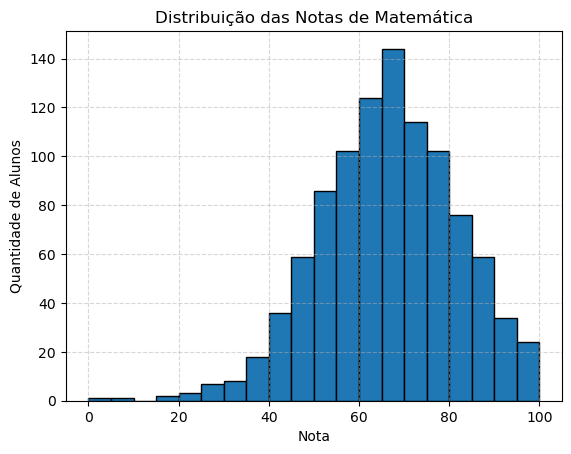

In [16]:
import matplotlib.pyplot as plt

# Histograma da distribuição de notas de matemática
plt.hist(df['math score'], bins=20, edgecolor='black')
plt.title('Distribuição das Notas de Matemática')
plt.xlabel('Nota')
plt.ylabel('Quantidade de Alunos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 📈 Distribuição das Notas de Matemática

- A maioria dos alunos obteve notas entre **60 e 80 pontos**.
- Há alguns poucos alunos com **notas muito baixas**, incluindo **nota 0**.
- A distribuição se aproxima de uma **curva normal**, com leve assimetria negativa (mais alunos com notas mais altas).


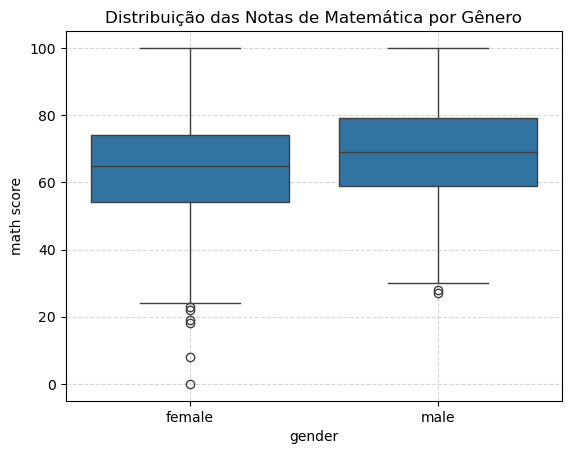

In [18]:
import seaborn as sns

# Boxplot das notas de matemática por gênero
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Distribuição das Notas de Matemática por Gênero')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 📦 Comparação de Notas por Gênero

- Os **meninos têm mediana ligeiramente mais alta** em matemática.
- A distribuição entre os dois gêneros é relativamente parecida.
- Alguns **outliers aparecem entre os meninos**, com notas extremamente baixas.

## ✅ Conclusões Finais

- O desempenho geral dos alunos foi regular, com **médias entre 66 e 69** nas três disciplinas.
- **Matemática** apresentou a maior variabilidade e **notas mínimas mais baixas**, incluindo alunos com **nota 0**.
- As **meninas** tiveram desempenho melhor em **leitura e escrita**, enquanto os **meninos** foram um pouco melhores em **matemática**.
- Alunos que **completaram o curso preparatório** obtiveram **notas mais altas**, especialmente em escrita, mostrando que o reforço educacional faz diferença.
- As distribuições das notas se mostraram **relativamente simétricas**, com poucos outliers.

### 📌 Considerações
Essa análise exploratória mostrou como fatores simples como acesso a preparo extra podem impactar o desempenho estudantil. Com mais tempo e dados adicionais, seria possível aplicar modelos de regressão ou machine learning para prever desempenho com maior profundidade.

---

📁 Este é o primeiro projeto do meu portfólio de transição de carreira para a área de análise de dados.  
🔗 Projeto disponível no GitHub:  https://github.com/Danilo99-ds/analise-de-dados-educacionais